In [1]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup
import re

# Import helper functions
import helper_functions as fu

In [2]:
# read xlsx file
def read_xlsx(file):
    df = pd.read_excel(file, header=0)
    return df

In [3]:
votes_meps_or = read_xlsx('data/EP9_RCVs_2022_06_22.xlsx')
voted_docs_or = read_xlsx('data/EP9_Voted_docs.xlsx')

In [4]:
print(votes_meps_or.shape)
votes_meps_or.head()

(811, 13469)


,WebisteEpID,Fname,Lname,FullName,Activ,Country,Party,EPG,Start,End,...,13450,13451,13452,13453,13454,13455,13456,13457,13458,13459
0,197490,Magdalena,ADAMOWICZ,"ADAMOWICZ, Magdalena",yes,Poland,Independent,EPP,2019-07-02,2024-12-31,...,2,2,2,1,1,2,1,2,1,1
1,189525,Asim,ADEMOV,"ADEMOV, Asim",yes,Bulgaria,Citizens for European Development of Bulgaria,EPP,2019-07-02,2024-12-31,...,2,2,2,1,2,2,1,2,1,1
2,124831,Isabella,ADINOLFI,"ADINOLFI, Isabella",yes,Italy,Forza Italia,EPP,2019-07-02,2024-12-31,...,2,2,2,1,2,2,1,2,1,1
3,197826,Matteo,ADINOLFI,"ADINOLFI, Matteo",yes,Italy,Lega,IDG,2019-07-02,2024-12-31,...,2,2,1,2,2,1,1,3,2,1
4,197403,Alex,AGIUS SALIBA,"AGIUS SALIBA, Alex",yes,Malta,Partit Laburista,S&D,2019-07-02,2024-12-31,...,3,3,1,2,2,2,3,3,2,1


In [5]:
total_votes_meps = int(votes_meps_or.columns[-1])
total_votes_meps

13459

In [6]:
print(voted_docs_or.shape)
voted_docs_or.head()

(13459, 24)


,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,Rapporteur,...,Policy area,Subject,Final vote?,Am No.,Author,RCV,Vote,Yes,No,Abs
0,1,1,1,15.07.2019,Tuesday - request by the GUE/NGL group,NaN,Non,Proposal for a decision,s,0,...,Foreign & security policy,Procedural vote,1.0,NaN,0,RCV,-,83,142,72
1,2,2,1,18.07.2019,Situation at the USA-Mexican border,NaN,Non,Joint motion for a resolution,s,0,...,Foreign & security policy,Paragraph 13,0.0,NaN,original text,RCV,+,311,269,33
2,3,2,2,18.07.2019,Situation at the USA-Mexican border,NaN,Non,Joint motion for a resolution,s,0,...,Foreign & security policy,Paragraph 14,0.0,NaN,original text,RCV,+,437,155,33
3,4,2,3,18.07.2019,Situation at the USA-Mexican border,NaN,Non,Joint motion for a resolution,s,0,...,Foreign & security policy,Paragraph 17,0.0,NaN,original text,RCV,+,441,158,27
4,5,2,4,18.07.2019,Situation at the USA-Mexican border,NaN,Non,Joint motion for a resolution,s,0,...,Foreign & security policy,Paragraph 19,0.0,NaN,original text,RCV,+,466,146,41


In [7]:
# Only choose legislative procedure with Parliament as co-legislator
voted_docs = voted_docs_or[voted_docs_or['Leg/Non-Leg/Bud'] == 'Leg']
voted_docs = voted_docs[voted_docs['Procedure'] != '*']
voted_docs = voted_docs[voted_docs['Procedure'] != '* ']

In [8]:
total_votes_leg = voted_docs.shape[0]
total_votes_leg

2582

How many times did MEPs on average not attend a vote?

In [9]:
# add column attendence with count of all 5s in each row
# get total votes by taking column header of last column

votes_meps_or['attendance'] = votes_meps_or.iloc[:, 10:].apply(lambda x: (x.ne(5).sum()/total_votes_meps), axis=1)


# average attendance
mean_att_EP9 = votes_meps_or['attendance'].mean()
print(f"Between 2019-2022, the average attendance of MEPs to all votes was {mean_att_EP9:.2%}")

Between 2019-2022, the average attendance of MEPs to all votes was 98.57%


How many votes were rejected?

In [10]:
# percentage of votes rejected
votes_rejected = voted_docs[voted_docs['Vote'] == '-'].shape[0]
votes_rejected_perc = votes_rejected/total_votes_leg
print(f"Between 2019-2022, {votes_rejected_perc:.2%} of votes were rejected")

Between 2019-2022, 38.26% of votes were rejected


How many laws were passed after the first reading?

In [11]:
# percentage of votes accepted or rejected after the first reading
votes_first_reading = voted_docs[voted_docs['Procedure'] == '***I'].shape[0]
votes_first_reading_perc = votes_first_reading/total_votes_leg
print(f"Between 2019-2022, {votes_first_reading_perc:.2%} of votes were accepted or rejected after the first reading.")

votes_first_reading = voted_docs[voted_docs['Procedure'] == '***II'].shape[0]
votes_first_reading_perc = votes_first_reading/total_votes_leg
print(f"Between 2019-2022, {votes_first_reading_perc:.2%} of votes were accepted or rejected after the second reading.")


votes_first_reading = voted_docs[voted_docs['Procedure'] == '***III'].shape[0]
votes_first_reading_perc = votes_first_reading/total_votes_leg
print(f"Between 2019-2022, {votes_first_reading_perc:.2%} of votes were accepted or rejected after the third reading.")


votes_first_reading = voted_docs[voted_docs['Procedure'] == '***'].shape[0]
votes_first_reading_perc = votes_first_reading/total_votes_leg
print(f"Between 2019-2022, {votes_first_reading_perc:.2%} of votes were on resolutions or motions of resolutions initiated by the parliament.")


Between 2019-2022, 92.53% of votes were accepted or rejected after the first reading.
Between 2019-2022, 4.73% of votes were accepted or rejected after the second reading.
Between 2019-2022, 0.00% of votes were accepted or rejected after the third reading.
Between 2019-2022, 2.71% of votes were on resolutions or motions of resolutions initiated by the parliament.


Establish Majority Labels

In [12]:
# Reshape df_mps to calculate vote percentages
votes_meps = votes_meps_or.drop(columns=[
    'Fname', 'Lname', 'WebisteEpID', "Activ", "Country", "Party", "Start", "End", "attendance"
    ])
# unpivot dataframe from wide to long format
df_mps_melted = votes_meps.melt(id_vars=['FullName', 'EPG'], var_name='Title', value_name='Vote')
#change vote to int
df_mps_melted['Vote'] = df_mps_melted['Vote'].astype(int)

print(df_mps_melted.shape)
display(df_mps_melted.head(20))

(10915249, 4)


,FullName,EPG,Title,Vote
0,"ADAMOWICZ, Magdalena",EPP,1,5
1,"ADEMOV, Asim",EPP,1,5
2,"ADINOLFI, Isabella",EPP,1,3
3,"ADINOLFI, Matteo",IDG,1,2
4,"AGIUS SALIBA, Alex",S&D,1,4
5,"AGUILAR, Mazaly",ECR,1,2
6,"AGUILERA, Clara",S&D,1,4
7,"AINSLIE, Scott",Greens/EFA,1,1
8,"AL-SAHLANI, Abir",REG,1,5
9,"ALEXANDROV YORDANOV, Alexander",EPP,1,5


Das hier nochmal nachschauen - über 1 Mio Nullen??

In [13]:
# print number of zeros for votes
print(f"Number of zeros in votes: {df_mps_melted[df_mps_melted['Vote'] == 0].shape[0]}")

Number of zeros in votes: 1394901


In [14]:
# set all votes > 1 to 0
df_mps_melted['Vote'] = df_mps_melted['Vote'].apply(lambda x: 0 if x > 1 else x)
df_mps_melted.head(20)

,FullName,EPG,Title,Vote
0,"ADAMOWICZ, Magdalena",EPP,1,0
1,"ADEMOV, Asim",EPP,1,0
2,"ADINOLFI, Isabella",EPP,1,0
3,"ADINOLFI, Matteo",IDG,1,0
4,"AGIUS SALIBA, Alex",S&D,1,0
5,"AGUILAR, Mazaly",ECR,1,0
6,"AGUILERA, Clara",S&D,1,0
7,"AINSLIE, Scott",Greens/EFA,1,1
8,"AL-SAHLANI, Abir",REG,1,0
9,"ALEXANDROV YORDANOV, Alexander",EPP,1,0


In [15]:
# group df_mps_melted by EPG and Title and calculate the sum the votes that are 1
df_mps_grouped = df_mps_melted.groupby(['EPG', 'Title']).agg({'Vote': 'sum'}).reset_index() # in agg-function, function to use on column has to ba a string, see "sum"

# sort the df_mps_grouped by EPG and Title
df_mps_grouped = df_mps_grouped.sort_values(by=['Title', "EPG"])
print(df_mps_grouped.head(20))

              EPG  Title  Vote
0             ECR      1     0
13459         EPP      1     3
26918  Greens/EFA      1    40
40377         IDG      1     0
53836          NI      1     2
67295         REG      1     2
80754         S&D      1    13
94213    The Left      1    22
1             ECR      2     1
13460         EPP      2     5
26919  Greens/EFA      2    67
40378         IDG      2     0
53837          NI      2     7
67296         REG      2    83
80755         S&D      2   114
94214    The Left      2    32
2             ECR      3     2
13461         EPP      3   118
26920  Greens/EFA      3    62
40379         IDG      3     0


In [16]:
# define number of members per group
num_SD = 144
num_EPP = 176
num_IDG = 64
num_NI = 46
num_Greens = 71
num_REG = 102
num_ECR = 64
num_Left = 38

# dataframe with group name and number of members
group_members = pd.DataFrame({'group': ['S&D', 'EPP', 'IDG', 'NI', 'Greens/EFA', 'REG', 'ECR', 'The Left'],
                              'members': [num_SD, num_EPP, num_IDG, num_NI, num_Greens, num_REG, num_ECR, num_Left]})
# set groups as index
group_members.set_index('group', inplace=True)
group_members

,members
group,
S&D,144
EPP,176
IDG,64
NI,46
Greens/EFA,71
REG,102
ECR,64
The Left,38


In [17]:
# calculate percentage of votes of all members in party
# go through each row of df_mps_grouped and divide the vote by the number of members in the party
for index, row in df_mps_grouped.iterrows():
    group = row['EPG']
    df_mps_grouped.loc[index, 'Sum_in_favour'] = (row['Vote'])
    df_mps_grouped.loc[index, 'Perc_in_favour'] = round(row['Vote']/(group_members.loc[group, 'members']), 3)
display(df_mps_grouped.head(20))

,EPG,Title,Vote,Sum_in_favour,Perc_in_favour
0,ECR,1,0,0.0,0.000
13459,EPP,1,3,3.0,0.017
26918,Greens/EFA,1,40,40.0,0.563
40377,IDG,1,0,0.0,0.000
53836,NI,1,2,2.0,0.043
67295,REG,1,2,2.0,0.020
80754,S&D,1,13,13.0,0.090
94213,The Left,1,22,22.0,0.579
1,ECR,2,1,1.0,0.016
13460,EPP,2,5,5.0,0.028


In [18]:
# pivot table back to wide format, set EPG and Title as columns, keep index from df_mps_grouped
group_perc_in_favour = df_mps_grouped.pivot(index='Title', columns='EPG', values=["Sum_in_favour", 'Perc_in_favour'])

# rename columns
group_perc_in_favour.columns = ["ECR", "EPP", "Greens/EFA", "IDG", "NI", "REG", "S&D", "The Left",
                                "ECR%", "EPP%", "Greens/EFA%", "IDG%", "NI%", "REG%", "S&D%", "The Left%"
                                ]
# change type of columns
group_perc_in_favour_1 = group_perc_in_favour.iloc[:, 0:8].astype(int)
group_perc_in_favour_2 = group_perc_in_favour.iloc[:, 8:].astype(float)
group_perc_in_favour = pd.concat([group_perc_in_favour_1, group_perc_in_favour_2], axis=1)

display(group_perc_in_favour.head(20))

# save group_perc_in_favour to csv
group_perc_in_favour.to_csv('data/group_perc_in_favour.csv')

,ECR,EPP,Greens/EFA,IDG,NI,REG,S&D,The Left,ECR%,EPP%,Greens/EFA%,IDG%,NI%,REG%,S&D%,The Left%
Title,,,,,,,,,,,,,,,,
1,0,3,40,0,2,2,13,22,0.000,0.017,0.563,0.000,0.043,0.020,0.090,0.579
2,1,5,67,0,7,83,114,32,0.016,0.028,0.944,0.000,0.152,0.814,0.792,0.842
3,2,118,62,0,7,91,121,34,0.031,0.670,0.873,0.000,0.152,0.892,0.840,0.895
4,1,125,65,0,5,92,122,29,0.016,0.710,0.915,0.000,0.109,0.902,0.847,0.763
5,1,129,67,0,4,99,128,36,0.016,0.733,0.944,0.000,0.087,0.971,0.889,0.947
6,47,138,5,0,16,101,11,33,0.734,0.784,0.070,0.000,0.348,0.990,0.076,0.868
7,46,129,7,3,2,98,65,2,0.719,0.733,0.099,0.047,0.043,0.961,0.451,0.053
8,48,144,67,28,20,99,96,4,0.750,0.818,0.944,0.438,0.435,0.971,0.667,0.105
9,50,144,3,27,13,100,77,0,0.781,0.818,0.042,0.422,0.283,0.980,0.535,0.000


In [19]:
# merge group_perc_in_favour with voted_docs, merge index with Vote ID
voted_docs['Vote ID'] = voted_docs['Vote ID'].astype(int)
voted_docs_groups = voted_docs.merge(group_perc_in_favour, left_on='Vote ID', right_index=True)

display(voted_docs.shape)
print(group_perc_in_favour.shape)
print(voted_docs_groups.shape)
display(voted_docs_groups.head(10))


(2582, 24)

(13459, 16)
(2582, 40)


,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,Rapporteur,...,S&D,The Left,ECR%,EPP%,Greens/EFA%,IDG%,NI%,REG%,S&D%,The Left%
82,83,10,1,22.10.2019,European Globalisation Adjustment Fund (2014-2...,***I,Leg,Draft legislative resolution,s,Blinkevičiūtė,...,119,29,0.562,0.790,0.817,0.531,0.522,0.755,0.826,0.763
83,84,10,1,22.10.2019,Fishing authorisations for Union fishing vesse...,***I,Leg,Draft legislative resolution,s,Davies,...,124,30,0.750,0.818,0.859,0.812,0.652,0.833,0.861,0.789
84,85,10,1,22.10.2019,Implementation and financing of the EU general...,***,Leg,Draft legislative resolution,s,Van Overtveldt,...,126,31,0.688,0.835,0.901,0.234,0.543,0.882,0.875,0.816
85,86,10,1,22.10.2019,Periods of application of Regulation (EU) 2019...,***I,Leg,Draft legislative resolution,s,Delli,...,131,30,0.781,0.835,0.930,0.781,1.109,0.902,0.910,0.789
149,150,12,1,24.10.2019,Financial assistance to Member States to cover...,***I,Leg,Draft legislative resolution,s,Omarjee,...,118,33,0.703,0.841,0.887,0.000,0.391,0.824,0.819,0.868
293,294,16,1,26.11.2019,EU-Ukraine Agreement Amending the trade prefer...,***,Leg,Draft legislative resolution,s,GYŐRI,...,118,0,0.750,0.835,0.070,0.016,0.500,1.000,0.819,0.000
366,367,18,1,28.11.2019,EU/USA Agreement on the allocation of a share ...,***,Leg,Draft legislative resolution,s,Lange,...,130,0,0.891,0.795,0.070,0.031,0.435,1.010,0.903,0.000
457,458,19,1,17.12.2019,Macro-financial assistance to Jordan,***I,Leg,Draft legislative resolution,s,Regimenti,...,144,25,0.875,0.915,1.042,0.953,0.522,1.069,1.000,0.658
458,459,19,1,17.12.2019,EU-Switzerland Agreement on the stepping up of...,***,Leg,Draft legislative resolution,s,Metsola,...,143,2,0.875,0.898,1.028,0.953,0.565,1.039,0.993,0.053
459,460,19,1,17.12.2019,EU-Liechtenstein Agreement on the stepping up ...,***,Leg,Draft legislative resolution,s,Metsola,...,144,2,0.875,0.915,1.042,0.922,0.565,1.069,1.000,0.053


In [20]:
tested_thresholds = fu.test_thresholds(voted_docs_groups, [0.66, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.97, 0.99, 1.0])
display(tested_thresholds)

,Consensus,Consensus%,RM,RM%,LM,LM%
Threshold,,,,,,
0.66,1304,0.51,230,0.09,335,0.13
0.70,1286,0.5,228,0.09,342,0.13
0.75,1269,0.49,234,0.09,342,0.13
0.80,1212,0.47,254,0.1,340,0.13
0.85,1153,0.45,238,0.09,311,0.12
0.90,1026,0.4,222,0.09,292,0.11
0.95,721,0.28,240,0.09,311,0.12
0.97,445,0.17,230,0.09,320,0.12
0.99,18,0.01,97,0.04,110,0.04


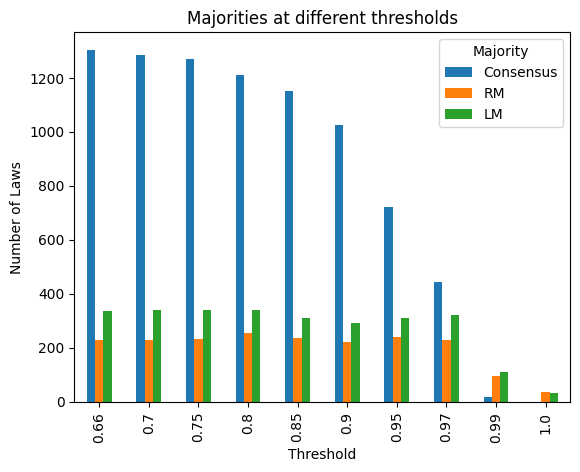

In [21]:
# plot the thresholds
tested_thresholds[["Consensus", "RM", "LM"]].plot(kind='bar', stacked=False)
plt.title('Majorities at different thresholds')
plt.ylabel('Number of Laws')
plt.xlabel('Threshold')
plt.legend(title='Majority')

plt.show()

In [22]:
voted_majorities = fu.get_majorities(voted_docs_groups, 0.66)

# concatenate the two dataframes
voted_docs_consensus = pd.concat([voted_docs_groups, voted_majorities], axis=1)
voted_docs_consensus.head(10)

,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,Rapporteur,...,EPP%,Greens/EFA%,IDG%,NI%,REG%,S&D%,The Left%,Consensus,RM,LM
82,83,10,1,22.10.2019,European Globalisation Adjustment Fund (2014-2...,***I,Leg,Draft legislative resolution,s,Blinkevičiūtė,...,0.790,0.817,0.531,0.522,0.755,0.826,0.763,1,0,0
83,84,10,1,22.10.2019,Fishing authorisations for Union fishing vesse...,***I,Leg,Draft legislative resolution,s,Davies,...,0.818,0.859,0.812,0.652,0.833,0.861,0.789,1,0,0
84,85,10,1,22.10.2019,Implementation and financing of the EU general...,***,Leg,Draft legislative resolution,s,Van Overtveldt,...,0.835,0.901,0.234,0.543,0.882,0.875,0.816,1,0,0
85,86,10,1,22.10.2019,Periods of application of Regulation (EU) 2019...,***I,Leg,Draft legislative resolution,s,Delli,...,0.835,0.930,0.781,1.109,0.902,0.910,0.789,1,0,0
149,150,12,1,24.10.2019,Financial assistance to Member States to cover...,***I,Leg,Draft legislative resolution,s,Omarjee,...,0.841,0.887,0.000,0.391,0.824,0.819,0.868,1,0,0
293,294,16,1,26.11.2019,EU-Ukraine Agreement Amending the trade prefer...,***,Leg,Draft legislative resolution,s,GYŐRI,...,0.835,0.070,0.016,0.500,1.000,0.819,0.000,1,0,0
366,367,18,1,28.11.2019,EU/USA Agreement on the allocation of a share ...,***,Leg,Draft legislative resolution,s,Lange,...,0.795,0.070,0.031,0.435,1.010,0.903,0.000,1,0,0
457,458,19,1,17.12.2019,Macro-financial assistance to Jordan,***I,Leg,Draft legislative resolution,s,Regimenti,...,0.915,1.042,0.953,0.522,1.069,1.000,0.658,1,0,0
458,459,19,1,17.12.2019,EU-Switzerland Agreement on the stepping up of...,***,Leg,Draft legislative resolution,s,Metsola,...,0.898,1.028,0.953,0.565,1.039,0.993,0.053,1,0,0
459,460,19,1,17.12.2019,EU-Liechtenstein Agreement on the stepping up ...,***,Leg,Draft legislative resolution,s,Metsola,...,0.915,1.042,0.922,0.565,1.069,1.000,0.053,1,0,0


In [23]:
# save voted_docs
voted_docs_consensus.to_csv('data/voted_docs_consensus.csv')

If the major parties voted in favour, in how many cases did the further right- or left-leaning parties vote with them?

In [24]:
vote_alingment = fu.get_vote_alingment(voted_docs_consensus, 
                                    ['The Left', "Greens/EFA", "S&D", "REG", "EPP", "ECR", "IDG"], 
                                    ['LM', "RM", "Consensus"]
                                    )
# rename columns
vote_alingment.columns = ['LM', 'LM%', 'RM', 'RM%', 'Consensus', 'Consensus%']

display(vote_alingment)

,LM,LM%,RM,RM%,Consensus,Consensus%
Voted with,,,,,,
The Left,327,97.61%,168,73.04%,1234,94.63%
Greens/EFA,325,97.01%,85,36.96%,1212,92.94%
S&D,335,100.00%,207,90.00%,1304,100.00%
REG,335,100.00%,230,100.00%,1304,100.00%
EPP,328,97.91%,230,100.00%,1304,100.00%
ECR,255,76.12%,228,99.13%,1274,97.70%
IDG,238,71.04%,223,96.96%,1172,89.88%


Add legislative text to each row in the dataframe

In [25]:
# extract report links
voted_docs_final = fu.construct_report_links(voted_docs_consensus)
voted_docs_final.head(10)

,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,Rapporteur,...,Greens/EFA%,IDG%,NI%,REG%,S&D%,The Left%,Consensus,RM,LM,Report link
82,83,10,1,22.10.2019,European Globalisation Adjustment Fund (2014-2...,***I,Leg,Draft legislative resolution,s,Blinkevičiūtė,...,0.817,0.531,0.522,0.755,0.826,0.763,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
83,84,10,1,22.10.2019,Fishing authorisations for Union fishing vesse...,***I,Leg,Draft legislative resolution,s,Davies,...,0.859,0.812,0.652,0.833,0.861,0.789,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
84,85,10,1,22.10.2019,Implementation and financing of the EU general...,***,Leg,Draft legislative resolution,s,Van Overtveldt,...,0.901,0.234,0.543,0.882,0.875,0.816,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
85,86,10,1,22.10.2019,Periods of application of Regulation (EU) 2019...,***I,Leg,Draft legislative resolution,s,Delli,...,0.930,0.781,1.109,0.902,0.910,0.789,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
149,150,12,1,24.10.2019,Financial assistance to Member States to cover...,***I,Leg,Draft legislative resolution,s,Omarjee,...,0.887,0.000,0.391,0.824,0.819,0.868,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
293,294,16,1,26.11.2019,EU-Ukraine Agreement Amending the trade prefer...,***,Leg,Draft legislative resolution,s,GYŐRI,...,0.070,0.016,0.500,1.000,0.819,0.000,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
366,367,18,1,28.11.2019,EU/USA Agreement on the allocation of a share ...,***,Leg,Draft legislative resolution,s,Lange,...,0.070,0.031,0.435,1.010,0.903,0.000,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
457,458,19,1,17.12.2019,Macro-financial assistance to Jordan,***I,Leg,Draft legislative resolution,s,Regimenti,...,1.042,0.953,0.522,1.069,1.000,0.658,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
458,459,19,1,17.12.2019,EU-Switzerland Agreement on the stepping up of...,***,Leg,Draft legislative resolution,s,Metsola,...,1.028,0.953,0.565,1.039,0.993,0.053,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
459,460,19,1,17.12.2019,EU-Liechtenstein Agreement on the stepping up ...,***,Leg,Draft legislative resolution,s,Metsola,...,1.042,0.922,0.565,1.069,1.000,0.053,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...


In [26]:
# extract summary links
# take each link from column "Report link", parse html, find "button" with id "summary"
summary_links = fu.extract_summary_links(voted_docs_final['Report link'])

Failed to retrieve or parse https://oeil.secure.europarl.europa.eu/oeil/popups/ficheprocedure.do?lang=en&reference=2019/0001(COD): 404 Client Error: Not Found for url: https://oeil.secure.europarl.europa.eu/oeil/popups/ficheprocedure.do?lang=en&reference=2019/0001(COD)
Failed to retrieve or parse https://oeil.secure.europarl.europa.eu/oeil/popups/ficheprocedure.do?lang=en&reference=nan: 404 Client Error: Not Found for url: https://oeil.secure.europarl.europa.eu/oeil/popups/ficheprocedure.do?lang=en&reference=nan
Failed to retrieve or parse https://oeil.secure.europarl.europa.eu/oeil/popups/ficheprocedure.do?lang=en&reference=2021/0211(COD): 404 Client Error: Not Found for url: https://oeil.secure.europarl.europa.eu/oeil/popups/ficheprocedure.do?lang=en&reference=2021/0211(COD)
Failed to retrieve or parse https://oeil.secure.europarl.europa.eu/oeil/popups/ficheprocedure.do?lang=en&reference=2021/0211(COD): 404 Client Error: Not Found for url: https://oeil.secure.europarl.europa.eu/oeil/

In [27]:
# add summary links to voted_docs_final
voted_docs_final['Summary link'] = summary_links
voted_docs_final.head(10)

,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,Rapporteur,...,IDG%,NI%,REG%,S&D%,The Left%,Consensus,RM,LM,Report link,Summary link
82,83,10,1,22.10.2019,European Globalisation Adjustment Fund (2014-2...,***I,Leg,Draft legislative resolution,s,Blinkevičiūtė,...,0.531,0.522,0.755,0.826,0.763,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
83,84,10,1,22.10.2019,Fishing authorisations for Union fishing vesse...,***I,Leg,Draft legislative resolution,s,Davies,...,0.812,0.652,0.833,0.861,0.789,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
84,85,10,1,22.10.2019,Implementation and financing of the EU general...,***,Leg,Draft legislative resolution,s,Van Overtveldt,...,0.234,0.543,0.882,0.875,0.816,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
85,86,10,1,22.10.2019,Periods of application of Regulation (EU) 2019...,***I,Leg,Draft legislative resolution,s,Delli,...,0.781,1.109,0.902,0.910,0.789,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
149,150,12,1,24.10.2019,Financial assistance to Member States to cover...,***I,Leg,Draft legislative resolution,s,Omarjee,...,0.000,0.391,0.824,0.819,0.868,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
293,294,16,1,26.11.2019,EU-Ukraine Agreement Amending the trade prefer...,***,Leg,Draft legislative resolution,s,GYŐRI,...,0.016,0.500,1.000,0.819,0.000,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
366,367,18,1,28.11.2019,EU/USA Agreement on the allocation of a share ...,***,Leg,Draft legislative resolution,s,Lange,...,0.031,0.435,1.010,0.903,0.000,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
457,458,19,1,17.12.2019,Macro-financial assistance to Jordan,***I,Leg,Draft legislative resolution,s,Regimenti,...,0.953,0.522,1.069,1.000,0.658,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
458,459,19,1,17.12.2019,EU-Switzerland Agreement on the stepping up of...,***,Leg,Draft legislative resolution,s,Metsola,...,0.953,0.565,1.039,0.993,0.053,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
459,460,19,1,17.12.2019,EU-Liechtenstein Agreement on the stepping up ...,***,Leg,Draft legislative resolution,s,Metsola,...,0.922,0.565,1.069,1.000,0.053,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...


In [28]:
# extract summary texts
summary_texts = fu.extract_summary_texts(voted_docs_final['Summary link'])

# append texts to voted_docs_final as new column
voted_docs_final['Summary text'] = summary_texts
voted_docs_final.head(10)


Summaries extracted: 1421Failed to retrieve or parse NA: Invalid URL 'NA': No scheme supplied. Perhaps you meant https://NA?
Failed to retrieve or parse NA: Invalid URL 'NA': No scheme supplied. Perhaps you meant https://NA?
Failed to retrieve or parse NA: Invalid URL 'NA': No scheme supplied. Perhaps you meant https://NA?
Failed to retrieve or parse NA: Invalid URL 'NA': No scheme supplied. Perhaps you meant https://NA?
Failed to retrieve or parse NA: Invalid URL 'NA': No scheme supplied. Perhaps you meant https://NA?
Failed to retrieve or parse NA: Invalid URL 'NA': No scheme supplied. Perhaps you meant https://NA?
Failed to retrieve or parse NA: Invalid URL 'NA': No scheme supplied. Perhaps you meant https://NA?
Failed to retrieve or parse NA: Invalid URL 'NA': No scheme supplied. Perhaps you meant https://NA?
Failed to retrieve or parse NA: Invalid URL 'NA': No scheme supplied. Perhaps you meant https://NA?
Failed to retrieve or parse NA: Invalid URL 'NA': No scheme supplied. Perha

,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,Rapporteur,...,NI%,REG%,S&D%,The Left%,Consensus,RM,LM,Report link,Summary link,Summary text
82,83,10,1,22.10.2019,European Globalisation Adjustment Fund (2014-2...,***I,Leg,Draft legislative resolution,s,Blinkevičiūtė,...,0.522,0.755,0.826,0.763,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to amend certain provisions relating ...
83,84,10,1,22.10.2019,Fishing authorisations for Union fishing vesse...,***I,Leg,Draft legislative resolution,s,Davies,...,0.652,0.833,0.861,0.789,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to extend the scope of the European U...
84,85,10,1,22.10.2019,Implementation and financing of the EU general...,***,Leg,Draft legislative resolution,s,Van Overtveldt,...,0.543,0.882,0.875,0.816,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to conclude an agreement between the ...
85,86,10,1,22.10.2019,Periods of application of Regulation (EU) 2019...,***I,Leg,Draft legislative resolution,s,Delli,...,1.109,0.902,0.910,0.789,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to enable the European Globalisation ...
149,150,12,1,24.10.2019,Financial assistance to Member States to cover...,***I,Leg,Draft legislative resolution,s,Omarjee,...,0.391,0.824,0.819,0.868,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to ensure certainty and continuity in...
293,294,16,1,26.11.2019,EU-Ukraine Agreement Amending the trade prefer...,***,Leg,Draft legislative resolution,s,GYŐRI,...,0.500,1.000,0.819,0.000,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to mitigate the negative effects of t...
366,367,18,1,28.11.2019,EU/USA Agreement on the allocation of a share ...,***,Leg,Draft legislative resolution,s,Lange,...,0.435,1.010,0.903,0.000,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,"PURPOSE: to conclude, on behalf of the Union, ..."
457,458,19,1,17.12.2019,Macro-financial assistance to Jordan,***I,Leg,Draft legislative resolution,s,Regimenti,...,0.522,1.069,1.000,0.658,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,"The Committee on Civil Liberties, Justice and ..."
458,459,19,1,17.12.2019,EU-Switzerland Agreement on the stepping up of...,***,Leg,Draft legislative resolution,s,Metsola,...,0.565,1.039,0.993,0.053,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to review the functioning of an exist...
459,460,19,1,17.12.2019,EU-Liechtenstein Agreement on the stepping up ...,***,Leg,Draft legislative resolution,s,Metsola,...,0.565,1.069,1.000,0.053,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to amend certain provisions relating ...


In [29]:
# save voted_docs_final
voted_docs_final.to_csv('data/voted_docs_final.csv')

Andere Fragen:

Is there a difference in consensus between adopted and rejected laws?